# Getting Started with Gemini Deep Research

This notebook demonstrates how to use the new Gemini Deep Research agent via the Interactions API to perform complex research tasks, generate images based on the findings, and translate the results.

**Preview:** The Gemini Deep Research Agent is currently in preview. The Deep Research agent is exclusively available using the [Interactions API](https://ai.google.dev/gemini-api/docs/interactions). You cannot access it through `generate_content`.

In [ ]:
!uv pip install google-genai --upgrade

In [2]:
import time
from google import genai
from IPython.display import display, Markdown

client = genai.Client()

## 1. Basic Research Task (Polling)

The following example shows how to start a research task in the background and poll for results. This is the standard way to interact with the Deep Research agent.

In [ ]:
prompt = "Research the history of Google TPUs."

interaction = client.interactions.create(
    agent='deep-research-pro-preview-12-2025',
    input=prompt,
    background=True
)

print(f"Research started: {interaction.id}")
# Poll for results
while True:
    interaction = client.interactions.get(interaction.id)
    if interaction.status == "completed":
        print(f"Research completed: {interaction.id}")
        break
    elif interaction.status == "failed":
        print(f"Research failed: {interaction.error}")
        break
    
    print(".", end="", flush=True)
    time.sleep(10)



display(Markdown(interaction.outputs[-1].text))

/var/folders/f1/3vdgcm01195b80qcp3t14n_m01b2f5/T/ipykernel_92393/2710857139.py:3: UserWarning: Interactions usage is experimental and may change in future versions.
  interaction = client.interactions.create(


Research started: v1_ChdWNHRmYVpUb0M0SDZ4czBQbV9LTTBBdxIXVjR0ZmFaVG9DNEg2eHMwUG1fS00wQXc
............................

# The Evolution of Google Tensor Processing Units: A Historical and Architectural Analysis

### Key Points
*   **Origins in Necessity:** The Tensor Processing Unit (TPU) project was initiated in 2013 when Google engineers realized that existing CPU and GPU infrastructure could not sustain the computational demands of ubiquitous voice search and deep learning applications without doubling datacenter footprints.
*   **Architectural Paradigm Shift:** Unlike the Von Neumann architecture of CPUs, TPUs utilize a **systolic array** architecture. This design mimics the flow of blood through the heart, allowing data to flow through thousands of arithmetic logic units (ALUs) without accessing memory for intermediate results, drastically increasing efficiency for matrix multiplications.
*   **Generational Evolution:** The lineage has evolved from the inference-only TPU v1 (2015) to the training-capable TPU v2 (2017) and v3 (2018), the optically-switched TPU v4 (2021), the specialized split of TPU v5e and v5p (2023), the high-performance Trillium (v6) (2024), and the inference-centric Ironwood (v7) (2025).
*   **Software Co-Design:** The hardware evolution is inextricably linked to the development of the TensorFlow, JAX, and XLA (Accelerated Linear Algebra) software stack, enabling the hardware to be abstracted as a supercomputer rather than individual chips.
*   **Edge Computing:** Parallel to datacenter accelerators, Google developed the Edge TPU and the Coral platform to bring machine learning inference to low-power, local devices, addressing latency and privacy concerns.

### Introduction to Domain-Specific Architectures
The trajectory of modern artificial intelligence is fundamentally constrained by the hardware upon which it runs. As Moore’s Law began to slow in the early 2010s, the general-purpose processor (CPU) could no longer deliver the year-over-year performance gains required by the exponential growth in neural network complexity. This necessitated a shift toward Domain-Specific Architectures (DSAs)—processors optimized for a specific class of workloads. Google’s TPU represents one of the industry's most significant commitments to DSA, specifically tailored for the tensor operations that underpin deep learning [cite: 1, 2].

### The Systolic Array Advantage
The defining characteristic of the TPU architecture is the systolic array. In a traditional CPU or GPU, values are repeatedly read from and written to registers or memory, consuming significant energy and time. In a systolic array, data flows from one processing unit to the next in a rhythmic fashion. The TPU v1, for instance, featured a 256x256 matrix of multiply-accumulate units (MACs). Weights are pre-loaded into the array, and activation data flows through it, performing massive matrix multiplications in a single clock cycle without intermediate memory access. This architecture allows TPUs to achieve orders of magnitude better performance-per-watt compared to general-purpose silicon [cite: 3, 4, 5].

---

## 1. Genesis: The Internal Crisis and TPU v1 (2013–2016)

### 1.1 The Computational Cliff
In 2013, Google’s internal projections indicated a looming infrastructure crisis. Calculations suggested that if every Android user utilized Google Voice Search for just three minutes a day, the company would need to double its entire datacenter capacity to handle the speech recognition workload [cite: 2, 6]. The computational intensity of deep neural networks (DNNs) and Large Language Models (LLMs) was incompatible with the existing fleet of CPUs and GPUs.

### 1.2 Architecture of the First Generation
The TPU v1, deployed internally in 2015 and announced publicly at Google I/O 2016, was an inference-only accelerator. It was designed not to train models, but to run them (inference) efficiently.
*   **Process Node:** 28nm.
*   **Clock Speed:** 700 MHz.
*   **Compute Engine:** A 256x256 systolic array containing 65,536 8-bit integer multipliers.
*   **Performance:** 92 TeraOPS (Trillion Operations Per Second).
*   **Memory:** 28 MiB of on-chip software-managed memory; no High Bandwidth Memory (HBM).
*   **Power:** ~40 Watts.

The v1 was essentially a massive matrix multiplication engine driven by CISC (Complex Instruction Set Computer) instructions sent over a PCIe 3.0 bus from a host CPU. It excelled at the low-precision (8-bit integer) arithmetic sufficient for inference, delivering 15–30x higher performance and 30–80x higher performance-per-watt than contemporary CPUs and GPUs [cite: 5, 7, 8].

### 1.3 Operational Impact
TPU v1 was instrumental in several high-profile Google successes. It powered the AlphaGo system that defeated Lee Sedol in 2016. It was also deployed for Google Street View text processing, allowing the entire Street View database to be processed in less than five days, and was integrated into RankBrain for search result optimization [cite: 8, 9].

## 2. The Training Era: TPU v2 and v3 (2017–2018)

### 2.1 TPU v2: Enabling Training (2017)
While v1 solved the inference bottleneck, the training of neural networks—which requires higher precision and backward propagation—remained a challenge. In 2017, Google introduced TPU v2, a fundamental redesign aimed at both training and inference.
*   **Floating Point Support:** Unlike the integer-only v1, v2 introduced native support for **bfloat16** (Brain Floating Point), a format that retains the range of 32-bit floating point but with reduced precision, ideal for machine learning [cite: 8, 10].
*   **HBM Integration:** To feed the hungry cores, v2 incorporated 16 GB of High Bandwidth Memory (HBM), providing 600 GB/s of bandwidth [cite: 7].
*   **The TPU Pod:** This generation introduced the concept of the "Pod," a supercomputer configuration. A v2 Pod connected 64 devices (256 chips) via a dedicated Inter-Chip Interconnect (ICI), creating a 2D torus topology capable of 11.5 PetaFLOPS [cite: 7].

### 2.2 TPU v3: Liquid Cooling and Scaling (2018)
Released in May 2018, TPU v3 pushed the thermal and performance envelopes.
*   **Performance:** Each chip delivered ~123 TFLOPS (bf16), roughly double that of v2.
*   **Thermal Management:** The increased power density necessitated the introduction of liquid cooling directly to the chip packages, a first for Google’s massive scale deployments [cite: 8, 11].
*   **Memory:** HBM capacity doubled to 32 GB per chip (in some configurations) with 900 GB/s bandwidth [cite: 11].
*   **Scale:** A TPU v3 Pod scaled to 1,024 chips, delivering over 100 PetaFLOPS of compute power. This generation solidified the TPU's role in training massive models like BERT and early Transformer iterations [cite: 10, 11].

## 3. The Edge Frontier: Edge TPU and Coral (2018–2019)

### 3.1 Bringing AI to the Edge
Recognizing that not all inference can or should occur in the cloud due to latency and privacy constraints, Google unveiled the Edge TPU in July 2018.
*   **Design Philosophy:** A miniature ASIC designed for "inference at the edge" within tight power and physical budgets.
*   **Specifications:** Capable of 4 TOPS (Trillion Operations Per Second) using INT8 precision while consuming only 2 Watts of power [cite: 1, 12].
*   **Coral Platform:** To democratize access, Google launched the Coral brand in 2019, offering development boards, USB accelerators, and System-on-Modules (SoMs) powered by the Edge TPU. This allowed developers to run TensorFlow Lite models locally on devices like Raspberry Pis [cite: 1, 13, 14].

### 3.2 Integration in Consumer Hardware
The Edge TPU architecture found its way into consumer devices, notably the Pixel Neural Core in the Pixel 4 and subsequent integrations in the Google Tensor SoC (System on Chip) used in Pixel 6 and later phones. These integrations power features like real-time photography processing, on-device translation, and voice typing [cite: 1, 15].

## 4. Optical Networking and Exascale: TPU v4 (2021)

### 4.1 The Interconnect Breakthrough
Announced at Google I/O 2021, TPU v4 represented a paradigm shift in system-level architecture. The defining innovation was the integration of **Optical Circuit Switches (OCS)**.
*   **3D Torus Topology:** Unlike the fixed 2D torus of previous generations, the OCS allowed TPU v4 pods to be dynamically reconfigured into various 3D torus topologies (e.g., 4x4x4 cubes). This flexibility allowed the system to route around failures and optimize topology for specific model parallelism strategies [cite: 10, 16].
*   **Scale:** A single v4 Pod contained 4,096 chips, delivering 1.1 ExaFLOPS of peak compute—ten times the bandwidth per chip at scale compared to standard networking technologies [cite: 7, 16].

### 4.2 Chip Specifications
*   **Process:** Likely 7nm (based on contemporary timelines and density).
*   **Compute:** ~275 TFLOPS (bf16) per chip.
*   **Memory:** 32 GB of Unified HBM2 per chip with ~1,200 GB/s bandwidth [cite: 16, 17].
*   **SparseCores:** TPU v4 introduced "SparseCores," specialized dataflow units designed to accelerate embeddings—a critical component of recommendation models which often bottleneck on memory access rather than raw compute [cite: 10, 17].

## 5. Divergence: TPU v5e and v5p (2023)

In 2023, Google bifurcated its TPU lineup to address distinct market needs: cost-efficiency and maximum performance.

### 5.1 TPU v5e: Efficiency First
Launched in August 2023, the TPU v5e (Efficiency) was designed for medium-scale training and high-throughput inference.
*   **Specs:** 197 TFLOPS (bf16) and 16 GB HBM2 per chip.
*   **Value Proposition:** It offered 2x higher training performance per dollar and 2.5x inference performance per dollar compared to TPU v4. It supports pods of up to 256 chips [cite: 18, 19, 20].

### 5.2 TPU v5p: Performance First
Announced in December 2023, the TPU v5p (Performance) was the most powerful TPU to date, specifically engineered for training massive LLMs like Gemini.
*   **Specs:** 459 TFLOPS (bf16) per chip.
*   **Memory:** 95 GB of HBM2e with 2,765 GB/s bandwidth—3x the capacity of TPU v4.
*   **Scale:** Scalable to 8,960 chips in a single pod using the high-speed OCS interconnect (4,800 Gbps/chip ICI) [cite: 21, 22].

## 6. The Modern Era: Trillium (TPU v6) (2024)

### 6.1 The Sixth Generation
Unveiled in May 2024, Trillium (TPU v6) marked a return to a unified high-performance architecture, focusing on the immense demands of generative AI.
*   **Performance Leap:** Google claimed a 4.7x increase in peak compute performance per chip compared to TPU v5e [cite: 23, 24].
*   **Memory:** Doubled HBM capacity (32 GB) and bandwidth compared to v5e.
*   **Energy Efficiency:** 67% more energy-efficient than v5e.
*   **Matrix Multiply Unit (MXU):** The MXU size was expanded (likely back to 256x256 or larger effective throughput) and clock speeds were increased to achieve the performance gains [cite: 25].

## 7. The Future: Ironwood (TPU v7) (2025)

### 7.1 The Age of Inference
By 2025, the focus of the AI industry began to shift from training massive foundation models to serving them (inference). Google’s 7th generation TPU, codenamed "Ironwood," was unveiled in April 2025 to address this "Age of Inference" [cite: 7, 26].

### 7.2 Architectural Specifications
*   **Inference Focus:** While capable of training, Ironwood is optimized for high-volume, low-latency inference and "thinking models" (reasoning agents).
*   **Performance:** A staggering 4.6 PFLOPS (FP8) per chip.
*   **Memory:** 192 GB of HBM3e per chip with ~7.4 TB/s bandwidth. This massive memory capacity is critical for holding the Key-Value (KV) caches of trillion-parameter models [cite: 27, 28].
*   **Scale:** Ironwood pods can scale to 9,216 chips, creating a single domain with 1.77 Petabytes of shared memory [cite: 26, 29].
*   **Power Efficiency:** Ironwood claims 2x better performance-per-watt than Trillium [cite: 30].

## 8. Comparative Specifications Table

The following table summarizes the key specifications across the major TPU generations.

| Feature | TPU v1 | TPU v2 | TPU v3 | TPU v4 | TPU v5e | TPU v5p | Trillium (v6) | Ironwood (v7) |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| **Year** | 2015 | 2017 | 2018 | 2021 | 2023 | 2023 | 2024 | 2025 |
| **Primary Use** | Inference | Train/Infer | Train/Infer | Train/Infer | Efficiency | Performance | Train/Infer | Inference/Scale |
| **Process** | 28nm | - | - | 7nm | - | - | - | 3nm/5nm (est) |
| **Peak Perf** | 92 TOPS (INT8) | 45 TFLOPS | 123 TFLOPS | 275 TFLOPS | 197 TFLOPS | 459 TFLOPS | ~926 TFLOPS | 4,614 TFLOPS (FP8) |
| **HBM/Chip** | N/A (SRAM) | 16 GB | 32 GB | 32 GB | 16 GB | 95 GB | 32 GB | 192 GB |
| **HBM BW** | 34 GB/s (DDR3) | 600 GB/s | 900 GB/s | 1,200 GB/s | 819 GB/s | 2,765 GB/s | 1,600 GB/s | ~7,400 GB/s |
| **Pod Size** | N/A | 256 chips | 1,024 chips | 4,096 chips | 256 chips | 8,960 chips | 256 chips | 9,216 chips |
| **Interconnect**| PCIe 3.0 | 2D Torus | 2D Torus | 3D Torus (OCS)| 2D Torus | 3D Torus (OCS)| ICI | ICI (9.6 Tb/s) |

*Note: Performance metrics often vary based on precision (INT8 vs BF16 vs FP8). v1 is INT8. v2-v6 are typically cited in BF16. v7 is cited in FP8.* [cite: 7, 16, 22, 27, 31].

## 9. Software and Ecosystem

### 9.1 The XLA Compiler
The secret weapon of the TPU is not just the silicon, but the compiler. XLA (Accelerated Linear Algebra) is a domain-specific compiler for linear algebra that optimizes TensorFlow, JAX, and PyTorch computations. It "fuses" operations, reducing memory access requirements—a critical optimization for the TPU's systolic array architecture. This allows the hardware to be agnostic to the higher-level framework, provided the XLA graph is generated correctly [cite: 8, 10].

### 9.2 JAX and Pathways
As models grew, Google introduced **JAX**, a Python library for high-performance numerical computing, and **Pathways**, a new asynchronous distributed dataflow system. Pathways allows a single model to span tens of thousands of TPU chips, abstracting the complexity of the underlying hardware topology. This software stack was essential for training Gemini and PaLM models on TPU v4 and v5 pods [cite: 10].

## Conclusion

The history of the Google TPU is a case study in the power of vertical integration. By controlling the entire stack—from the datacenter cooling systems and optical switches to the silicon architecture and high-level compiler—Google has managed to scale AI performance exponentially over a decade. From the humble beginnings of the TPU v1 saving Google from a datacenter crisis to the massive, liquid-cooled Ironwood superpods powering the age of generative AI, the TPU remains a cornerstone of the global AI infrastructure. As the industry moves toward trillion-parameter models and agentic AI, the TPU's architectural focus on interconnect bandwidth, memory capacity, and systolic efficiency positions it as a critical counterweight to the dominance of general-purpose GPUs.

**Sources:**
1. [viso.ai](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQH0OAYEEnuaXQmn79V_Dz_dZcOo9GqYmww5r1U0YPVdfgSm-zwkYlgIFM2rjZkEIAOhXpJ1ZsyZA24F2uubJz-1RDAEW8v4b8Zz058e90NAfI6o2hA7itnhvYf-)
2. [medium.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQH9x0BVh44RHvDCEarkgDtoPOLsMAN_5yH0L204U40UZr22aMXbBr48eZVzknL75teP9DuYiPX5WYAXRL_KwgNqEI4Gq9VwNoRfmgGYL7Xcl7F5KycX8jP1TfMe71iiCTGMcdpRh-LkPXZYCSagK3aJCdds3axhBzxdxo3E3mgWs0tVwfSlCLG5iKf4X7cRqbhiKBn86c43gr6daZajM8FeGrWqR3We_oFu)
3. [google.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQEOLD-euz7QEFzWD6hCbeJHnoBCsPSKTxbbiJV1pLv5DoXFpCyTdLdlv6cgF4mCrOLjCJH1bQ26LSzaAzSEAz0fL6TpSa3NVk7ZmjCiWx1mQf2cUGSG04ldxWMu044ksJD8cyZdYWZniKtMNeBJtsRYFa1RFD2T-Q==)
4. [bytebytego.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHUHPBIjDwRremV5ujmmdzVARsy3CSlpcUGeTxqfXhpcRc0CErE-5Qu5RA-HcHdbjf-sldjQvW_fj0t0JYN-tU6mArVSzjhSrYtQ9XZIPGsvbdHk1P_QoCIGeLkFTGXaIcK-h_L3vcQNEDAtbuAvNebNO1mTw4F)
5. [google.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQEEnT-MAG9sAe-0IUrl23v61OiUp8BzNAcv6lcQiO9YUHKurQWbievKi-aZ5D5IoiLB0NbKnJHswxqvPZjWAuD8ppizJM9uBrwnjI5LYZddpLHYOgHyOuncbipvZXk-Cdn83Q0EInQq0gSh_uW94yaBBZSI99KA2MIK6wnA1sEZcV9ciuIO_4xuCdGEKQ7ErNMPDyw-W6a7m_vYSIb_fsvyBo1-3ZgE3EqRQF11Ew==)
6. [google.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQG-jS_UF0SZ_ghU3oKf9QTat-U4BExuNKdcijvm7gwUDmo-9JSpS7L6wylu4p_IpArXcgRnyCWlT9SAw4vIJvuOK9p6JjYt2zxiZeTIy1ozJKKz6aYx6ErqqUB1n_3CBFBSXheTYguZVhq_wKmKedZcF5izXhVwcZ5y3h5NrbtEPA==)
7. [wikipedia.org](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFcgR6FysipTq0VVzYYHIS5-mvYzJu78exta1nrYToRMdG3jswyRrbz40L0IgzX6D1uzUYdK-F2o2M3oNwtnozRUURABKozN213AZxT-BsD6GFoJDL3UFZ2JBrthjlHmv5li4Zy-fTzjXyO)
8. [introl.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGVyVl4KAeCzF-QjO8O8gArDDT6DVSIMNmMFYb_hVuWpZxUFGrTPYmigRB9TewS_YWSE_NFUzpQ5nV813vZtyMoy15gKJConRvqlExJvukdScstGJwhjVgEa_Q3-Ii8yOeqpLY2sHKpdyJwdD_RyjpAv8hVOF2IRUbxQYGsQbJy0heT)
9. [medium.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGSOXoIyZ6fR3D8Snd7blFdSa84cGo-PvTPknbVp8ZEGZrwAhimVrUjwy-WLURtIKxAXjd8Rs8K0r5o5VUGAtGWJwtS7i0vEEEO26Hip32UMaHCr5WfZ-jxFL4pKJrsxLkz3aDwj_9P8-3cMKLoaA4dAvU1DV8=)
10. [intuitionlabs.ai](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQF8deIQ-I4IeBvGMMbsqwDtXr6_zg39XUNfVntknSQiGzEhO1a43tu24NlGjrOx7ZT_ewr8mWk3hM65bMvP346oafOVar1W4NGnZTFNHIcRTXI6xAz_a3FlCN-H_N_Z9kSKs1oJbx3XuIt8FiMmza_V6a79Q3e1sqg=)
11. [google.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFxc11tz916jwWFaOoVOv0NC0vpNTrZOdUxugAW1OA2YdPY9h_csaXKf4NpCjjtW4ytKevU-rWqXk44NVwrdlpyGJxcplBKy8UN6rrf7rmRzswZTOoR2RzGVRWqbFbCpg==)
12. [wikichip.org](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQEL5wDLUTAXuUNVTFe4koc9UZU_9GvZdXTSyE2eaq5X4mZUZo65lwRHDk0Pi5afnS7Q282Fq9NjgA7O2YUfsA423vUe4wMQ5mzNShtUeBd34Z_HSoKtEC5fLHGEBtmUvnugJiFZl54=)
13. [thenewstack.io](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGhj0ujJwRgb4GcyipEbyQulu5to-KjegqI-JgWZ1teziymGcK1JmHUi9BhKKN90eilLPu84RTeKAm4fgmnqSSLMTRP-U0ANIlkO914kBnX0VHgeIGJrDHp0EEd-tRCpMRf92MVGRJ0Ix9Eo2PfPMzLFZu_wz0S-vqrRm2VY_upDbJdVyteJcmE65wdRp_ftZHCyA==)
14. [abopen.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFbCwAXbizoEYqaXKT5z3YNi9c9GjoZrzGB0s6kqhpiPHd3u8Y6XYAHqpCA8QAYCOqIiXkpewN6rvvuneqOOthKMLrCBeyD0SHfuD_FJb06tk86DvTCo7KTXfl5HbuPQhRbQd6T8gztNN0sfg_s5p8k3ZZ7-QKzjRjUVR8DDymZrWsWoZKo8L9eJKCdFzm8zA==)
15. [wikipedia.org](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFfDatVfjCwlSM47A3xh2h4mf2KlShEhQO16jvPqYmjsuJNnwHPJ_lRzoAMjPmN8_Okmjt7xoGUdjqUbc9cSnXAiTA845Q0eszH2gIURvL-xDwSIccTxHasPMV2XDDTv97W)
16. [google.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQG867SFcAt0LhmNYyu5fOoUmXrZ-H0xKmuvsyJCl3mJvY_9WeOgLTQ1BiNGq32-kG0WrpQp5KE3Kzi5mRJMxnWaCYIK1VfJZSrvbGbcNP_hgYVOSUtQ8kxFTu7THpOvXg==)
17. [elprocus.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGVJMEFhsK981JxmqAi6fqIrAWCXl_NmEmOAzgQUfbd8TZLvwsrnuvoUyVHoFAL55GbuG7DYXKTi8OuCi323iSx90seMhDzuwWrQ-OIgvSssGLZZ47boyR8AF7Z-Wg=)
18. [convergedigest.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQEFUdVSiz2gNWyg8C9iVXrj8hNR8OdPmuOw1NI-vDuRAs9C697Bvr0WkEmxLNPMsLAuw6Qi6B8-JZUJnHPYzTx23ixXCd-un2beJSO2pWSlEcJ3RJ_ph8G9xFgx_lQefzLoiZJzH1kek64aX8XMvVxI)
19. [techpowerup.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFafvicYQJYhG8ZZxRpDHueAE19T3qsTjaAUMCcXEWvSf7w4Hf265tYt9wn_c7D4CopWnnhK7z6jJXcy9p_P1tc_KxQDyvkNbhfTxnEmL_KXKpY_XGgp7Mc1A47d7jvx-rfbzCnksn-Cu3RG5ij85IrL1Gbf0eU0b11p3ikgJqAH399Ysi-yHoQRCBz3YJTweVg16Ioi2J4EVhdNc-Q8to=)
20. [google.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGHmwdJ3hBR7Xo5WS5_tVXoP2OWjP7m42EZukbTs80EhA-drwj3A4FeCbdaKwzT_ohACDmrEB7Y_JTI_SN8jatyKO-wn2LxBT7XqCDdX3gVPdsRs9zeUZC6MyoMVVo8JT8=)
21. [google.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFKUSL9rcddf1Fbl3f7VqNE0LwVI9Fonl5FBV0z-ydISBKLss4zPvLuo-kqmToo4dKxAunETUB691VSueXJB4JKN7jpbvDNGUQ6CJrXSGC2Fj-HbUixtYkuVxsLqIsREcowixVdIAOcIhZHrmpGq-1wjctNojr1NYfXerxMl9ibpn-ujtV7ZyuYCui0OWPJFFHfKYFup98RdJCjcUWOyis=)
22. [google.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQH4p0-bN9GW8fObnyv5L4Uzf22UeU0XojqoHeunSzZ7cxAc2-xeJtfHjn0aJRmkOZOJs8SnqqVMZHBadCa5FHwGlBM64G7KghzCpV4McWZNjVMR-s2R8hQ3ECFVkJEdig0=)
23. [itdaily.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHrx3Bho17HqV0yf5LrFTSHqKgA36qWzAkZzyMwMr4_frOCcuiZKK_hMZiQnkncbA-T00aZmmELkkieAczALm8tTKuGHrUqKI7zgCFIuRiO62AbKhSGbHUeC1ei97UECkXiKg4A1xL78U0tqss=)
24. [google.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGJWrlWcfCtFowtJ2xiIoVzDTc6-ZuQwBiD5lpAfn3h0qrXEHI0116vHw-iok_CU1lpg3A-RE28jRfa6ufFUitOTF7DUJkYfPwLrgcLJrjjq3FUM5JBSb_SSfb5lBR2u0UCD-aLeVstH6nIihni4fZYgd87pn5kXiSc6e8j37j753CPdGiLXEuN3-ssNdRbPNQ=)
25. [google.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQE-iXXfjszKIeC0jDRj5_Hqgl_yTLkRBYpZsQZGo1KmYjdvOChEFa9mFg3263TIW_rP6_jisJ8VqrgufvUkCXOYEXLrri9JGjq6OojRWm03iLHW7minig1wFAyWp7FwWzJNdoo7Os6aUJJevvaCN28erxEy8sRHwMpHrZ8084D0QSDw8WhozQ==)
26. [yolegroup.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGMxtb60-ssqMq1zO_tsIXDgoonTb2xLd1OxWjGh6bJhiILWhaFT9OXIwAASOToh-94spAZMEZiIshhu9wgFZ7S__kpVi3r7iVyLO6mq5IaK4WHJtnxb3-Lk52k9sVSwvu726GUuE1oyer6nv-7Ivk8EiqANfFEdkKqLf-tAM_YknRaoWHSnxbVSamqPg-XnzI=)
27. [financialcontent.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHFh4M4A1GnB_KCAQ707Aj8s2oeqHhyysu6EtQsBqXaBdLC2CvKOR0xmzFFOi8y2HAsxtbLNmMNA1iE3W82M4Vw1X5Hk1XCk2RcLpVriJqsrZm-t13Ob8JTLXcAhLa-65HBu3FBq3J690kHzJy_oAMvA2cDwHceeyEfWRZjmDnw3jHW1FQgutGycUDDTAJ6zdjhovfBFSQu6aVoB0B-U4Dai7UGRLVz2AwSL_hZA_L0uFaBMXS5EYQXVtZTUYBcDttgjHZWJINYCKff8STy)
28. [ctol.digital](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGRraf0jX2CQ74ip15S7NXiDm8SBvxxLdSU12IXrQj9YzDF0Fg3JCjgXi3TljfAjaW2-3nALSPsfRMamLvh__9-ULlzIBPHDLrHFM0QQ0RaSHPI0UQNf6_Goshmue5dPOXNggGZj2kezLBOu9bLNwEiqBPpYV3QzVAkVaEZNZitBjFlkwVkJxR0ka21VuzpRWRZ9FrMd2t0UbNXyZCVr88ezlRwplSfqqK19w==)
29. [google.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQG7sWDmrlpKfXGzLdtN7j5UYtwrJmE5lmVZp416gEXatJK9J8scLKoTJmQuHqyWP0BnbxCErmYbV46XgE28Ag18B9s9LuYM76rvWm_jAfrZ3fcKvlD3C-6vvs4lU_cbthH9bPryCG25t6QMjOwnpZNr9-DzBZdpThoqtAQefDUOK__WZEs5WMFOrEom0XvVBA_4_KH4S8b62wbCR-NJcCpd)
30. [insidehpc.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGKraV-gdGWA6YJ_UTU4QPGX0WMMLE7QcFoRiQFpL2hslK7kHR3aAOUBArFihnEQHFQGT4UZEFA1T7bpj5ctOHadpFHnelTl5Ii2CAnGnCnpGvYZDAGwF6Dk3DAFoS5LTsPAX4L5OgcfHj0mmfA3Jpg3UkRaJu2qIwa)
31. [google.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQEPa7JhUmgiWKhLinGLI7EsFnboXODO8E2mk-G07Z96UHQsIcPBYAiGlK6_BE5z5TafxiZ47Erb0j3M0r9JAKzrVd_Qn261ynbVpOxJCTwRk6npN0zBuoDzIKmAu5EIdew=)


## 2. Advanced Research Task (Streaming, Thinking, Promoting)

Deep Research supports streaming to receive real-time updates on the research progress (`thinking_summaries`). You can steer the agent's output by providing specific promting instructions. 

In [5]:
# Define a complex prompt with formatting instructions
prompt = """
Research the history and future developments of the Google TPUs.

Focus on:
1.  Key technological breakthroughs in the last 12 months.
2.  Major competitors and their projected timelines for mass production.
3.  Future developments and plans for 2026 and beyond

Format the output:
- as a strategic briefing document for an developer educating themselves about the Google TPU landscape.
- Include a table comparing the top 3 leading companies.
- Use short concise sentence and bullet points.
"""


stream = client.interactions.create(
    agent="deep-research-pro-preview-12-2025",
    input=prompt,
    background=True,
    stream=True,
    agent_config={
        "type": "deep-research",
        "thinking_summaries": "auto"
    }
)

interaction_id = None
last_event_id = None
report = ""

for chunk in stream:
    if chunk.event_type == "interaction.start":
        interaction_id = chunk.interaction.id
        print(f"Interaction started: {interaction_id}")

    if chunk.event_id:
        last_event_id = chunk.event_id

    if chunk.event_type == "content.delta":
        if chunk.delta.type == "text":
            report += chunk.delta.text
        elif chunk.delta.type == "thought_summary":
            print(f"{chunk.delta.content.text}\n", flush=True)

    elif chunk.event_type == "interaction.complete":
        print(chunk)
        print("\nResearch Complete")
        

prev_ia = client.interactions.get(interaction_id)
print(prev_ia)

display(Markdown(report))


Interaction started: v1_ChdwRk9BYWVfMUlfTC12ZElQamVQdjhBdxIXcEZPQWFlXzFJX0wtdmRJUGplUHY4QXc
**Establishing Research Context**

I am initiating the research process to prepare a strategic briefing document on Google TPUs, focusing on key advancements in the last 12 months (February 2025 to February 2026) and future roadmaps extending to 2026 and beyond. The final output will include a comparison table of the top three competitors, tailored for a developer audience. I will first gather contextual information on the history of TPUs before diving into the recent technological breakthroughs, competitor landscapes, and long-term plans.



**Information Gathering Strategy**

My initial strategy involves targeted searches to identify specific Google TPU generations like Trillium (v6) and any successors, as these are likely the focus of recent innovation. Simultaneously, I will begin profiling major competitors, including NVIDIA's upcoming architectures (like Rubin), AMD's Instinct line, and cu

# Strategic Briefing: Google TPU Landscape (History, Status, and Future)

**To:** Developer / AI Infrastructure Architect
**Subject:** Strategic Analysis of Google TPU Evolution, Competitor Landscape, and 2026+ Roadmap
**Date:** October 2025 (Simulated Current Context based on Research Data)

## Executive Summary
Google has aggressively accelerated its custom silicon roadmap to challenge NVIDIA's dominance. The last 12 months marked a pivot from purely internal optimization to aggressive commercial scaling, highlighted by the release of **Trillium (TPU v6)** and the announcement of **Ironwood (TPU v7)**. For developers, the most critical shift is the unification of the software stack, breaking down barriers between JAX and PyTorch via the **vLLM TPU** backend. By 2026, Google aims to transition from a cloud provider to a global AI utility, with projected deployments exceeding 5 million units by 2027.

---

## 1. Historical Context: The Evolution of the TPU
*   **Origins (2015):** Google introduced TPU v1 specifically for internal inference workloads (Search, Translate), realizing standard CPUs/GPUs could not sustain the required throughput [cite: 1, 2].
*   **Training Era (v2 - v3):**
    *   **TPU v2 (2017):** Introduced training capabilities and High Bandwidth Memory (HBM), enabling the training of large models like BERT [cite: 2, 3].
    *   **TPU v3 (2018):** Doubled performance per chip and introduced liquid cooling to pods [cite: 3, 4].
*   **Scale and Efficiency (v4 - v5):**
    *   **TPU v4 (2021):** Moved to 7nm process; introduced Optical Circuit Switching (OCS) for dynamic topology reconfiguration [cite: 4, 5].
    *   **TPU v5 (2023):** Bifurcated the line into **v5e** (efficiency/inference) and **v5p** (performance/training), optimizing cost-to-performance ratios for different workloads [cite: 4, 5].

---

## 2. Key Technological Breakthroughs (Last 12 Months)
*Note: This section covers developments from late 2024 through late 2025.*

### Hardware: The Trillium and Ironwood Leap
*   **Trillium (TPU v6) Deployment:**
    *   **Performance:** Delivers **4.7x peak compute performance** and **67% better energy efficiency** compared to TPU v5e [cite: 6, 7].
    *   **Specs:** Doubled HBM capacity and Interchip Interconnect (ICI) bandwidth. Features 3rd-gen **SparseCore** accelerators for embedding-heavy workloads (ranking/recommendation) [cite: 6, 8].
    *   **Scale:** Scales to 256 chips per pod, with multislice technology connecting tens of thousands of chips [cite: 6].
*   **Ironwood (TPU v7) Announcement:**
    *   **Purpose:** Designed specifically for the "Age of Inference" and agentic workflows, optimizing for low latency at massive scale [cite: 5, 9].
    *   **Specs:** **4.6 PFLOPS (FP8)** per chip, rivaling NVIDIA's Blackwell B200. Features **192 GB HBM3e** memory per chip (6x increase over Trillium) [cite: 10, 11].
    *   **Cluster Size:** Supports massive pods of **9,216 chips**, significantly larger than standard GPU clusters, enabling massive model residency [cite: 11, 12].

### Software: The JAX/PyTorch Unification
*   **vLLM TPU Backend:**
    *   Google released a unified backend for **vLLM** (the popular open-source inference engine) that supports both JAX and PyTorch [cite: 13, 14].
    *   **Impact:** Developers can run PyTorch models on TPUs with zero code changes via `Torchax`, removing the historical friction of migrating from CUDA to TPU [cite: 14, 15].
*   **Project EAT:**
    *   A company-wide initiative to unify chip design, infrastructure, and developer tools. The goal is to create a coherent platform that reduces TCO (Total Cost of Ownership) and latency for both internal teams and cloud customers [cite: 16].

---

## 3. Competitive Landscape: Google vs. NVIDIA vs. AMD

### Comparative Analysis Table (2025-2026 Outlook)

| Feature | **Google (TPU)** | **NVIDIA (GPU)** | **AMD (Instinct)** |
| :--- | :--- | :--- | :--- |
| **2025 Flagship** | **Ironwood (TPU v7)** | **Blackwell Ultra (B300)** | **Instinct MI350** |
| **2026 Flagship** | **TPU v8 (Projected)** | **Rubin (R100)** | **Instinct MI400** |
| **Architecture** | ASIC (Matrix-centric, Systolic Arrays) | General Purpose GPU (CUDA Cores) | CDNA (Compute-focused GPU) |
| **Memory (2026)** | HBM3e / HBM4 (High Capacity focus) | HBM4 (High Bandwidth focus) | HBM4 (Capacity leadership) |
| **Interconnect** | ICI + Optical Circuit Switching (OCS) | NVLink + InfiniBand/Spectrum-X | Infinity Fabric |
| **Primary Software**| JAX, PyTorch/XLA, vLLM | CUDA, TensorRT | ROCm (Open Source) |
| **Key Advantage** | Cost/Performance, Massive Pod Scale | Ecosystem Maturity, Raw Power | Memory Capacity, Open Ecosystem |

### Competitor Timelines
*   **NVIDIA:**
    *   **Blackwell Ultra (2025):** A refresh of the Blackwell architecture [cite: 17].
    *   **Rubin (2026):** The next-gen architecture featuring **HBM4** memory. Mass production is expected in late 2025/early 2026 [cite: 17, 18].
    *   **Strategy:** Moving to an annual release cadence to maintain performance leadership [cite: 17].
*   **AMD:**
    *   **Instinct MI350 (2025):** Based on CDNA 4, targeting inference with 35x performance gains over MI300 [cite: 19, 20].
    *   **Instinct MI400 (2026):** Will utilize **CDNA Next** architecture and **HBM4**, aiming to compete directly with NVIDIA Rubin [cite: 21, 22].
    *   **Strategy:** Focusing on memory capacity advantages (up to 432GB on MI400) to hold larger models per GPU [cite: 22, 23].

---

## 4. Future Developments: 2026 and Beyond

### Roadmap & Strategic Shifts
*   **Massive Scale Deployment:**
    *   Google projects to have **5 million TPUs** deployed by 2027. This shift aims to position compute as a "global utility" rather than just a cloud service [cite: 24].
    *   **Anthropic Partnership:** Anthropic has committed to using over 1 million TPUs (approx. 1 GW capacity) for training Claude models, validating the TPU's capability for frontier models [cite: 24, 25].
*   **Hardware Evolution (TPU v8):**
    *   **Process Node:** Expected to utilize **TSMC 3nm** process technology [cite: 26, 27].
    *   **Partnerships:** Reports suggest Google may partner with **MediaTek** for future TPU production (potentially v8 or edge variants) to diversify supply chains beyond Broadcom [cite: 26, 28].
*   **"Age of Inference" & Agentic AI:**
    *   Future architectures will prioritize **inference efficiency** over raw training throughput.
    *   Focus on **Agentic AI**: Systems that plan and execute multi-step tasks. This requires hardware optimized for long-context windows and complex logic, driving the design of chips like Ironwood and its successors [cite: 9, 29].
*   **Infrastructure Unification:**
    *   **Optical Interconnects:** Continued heavy investment in OCS (Optical Circuit Switching) to allow dynamic reconfiguration of clusters at runtime, reducing power and latency [cite: 30, 31].
    *   **Power Management:** New data center designs (Project EAT) will integrate liquid cooling and power management more tightly with the chip architecture to handle densities exceeding 100kW per rack [cite: 16, 30].

### Developer Implications
*   **Ecosystem Lock-in Reducing:** With the maturation of PyTorch/XLA and vLLM, developers are less "locked" into NVIDIA's CUDA.
*   **Cost Efficiency:** Google is positioning TPUs as the "price-performance" leader (approx. 20-50% lower TCO than NVIDIA), making them the preferred choice for inference-heavy applications [cite: 24].
*   **JAX Dominance:** While PyTorch support is improving, JAX remains the "native" language of TPUs, offering the highest performance ceiling for research and training [cite: 32, 33].

---

## 5. References
*   **[cite: 1, 2]** History and origins of TPU v1.
*   **[cite: 3, 4]** Evolution of TPU v2, v3, v4.
*   **[cite: 6, 7]** Trillium (v6) specifications and performance claims.
*   **[cite: 10, 11]** Ironwood (v7) specifications and comparison to Blackwell.
*   **[cite: 13, 14]** vLLM TPU backend and software unification.
*   **[cite: 17, 18]** NVIDIA Rubin and Blackwell Ultra timelines.
*   **[cite: 21, 22]** AMD MI350 and MI400 roadmaps.
*   **[cite: 16, 24]** Future scale (5M units), Project EAT, and Anthropic deal.
*   **[cite: 26, 28]** TSMC 3nm plans and MediaTek partnership rumors.

**Sources:**
1. [google.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHzQQlniFbaAHVVk0s8f62gLFBzUFdDR4EdSZxSgwwC4NRVm3RYVCYrpRY_IgITD7Flv-ZI7QfOlIsN5plwLJp27CorY_z-cKcW4FLRswkx6OD0tv2SsI2OWZk5o4yd34fihkbIQEP9AUfF-u0a4b7wznOD69_7QYn1iLQdo_uz)
2. [orhanergun.net](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHpni_FPAQ459z1ET4GPaC1riBfE03-7mRX0TCU9GvCi0mZ_mHl98cpxrELFPGQeBEGKZsBQWPXKx1HVDVK1DXbgB1cuEm3rLPTEBkSWdJZOQK3Y4EoTtywc5wr1tO3vv-B167Jyy5kWPsiRErxVK07qGKP9_8hl72wjTvgdEjmGocMhLo=)
3. [medium.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQEiz5m9XWs-x3BbGDjfI4PCSJhqwuBqHdje_3X4nPcuSRwjJvL4qY-btp1dlhsfj1HGSUp0wvFojdSpYbDoym_1ZDBK6LZOI4OjC-kS_4X9vOpbNTql30v2WFossjxcQ-BVDraWADDaBWpFYUYcIunJ8Pe8Fj0qR8JzlLu2R-kIqU87EuuN-PE_tUP_NUX3TAbARg_yA2E=)
4. [wikipedia.org](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQEXvZ7VPj-VgaJJv539gJYyW8qs9C4JIcjjHkBBKc_jXT6gPQ0o5c8nbiqXdVqSFh87ZlhC9q1uF8xuIC-_sEcYmAZ0ol70IFjMCPuhX_EawJmnDBvl-pGND9ib73A2h9MXjM568aKnF6g=)
5. [uplatz.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQEyFU5D1t_ERXzXJ3qJ5uqeelI8-h3FSyOChvV_lZQe-Au-io0sHfWL_XG698C8NyO4_XiOFKPvF32znLukG1XHzMPg0ZMRp7N71FOcBNkeXbgNNUyXeTh-YhRIfI-E8G2_UOq9YaswZN33M5h9XnsXSIjpE_kXgSSSpZAjkhJeXfIsOJfEXTPq1t0PTuYRsYaDFr5ZID-a7J0qaIgdlxN7Qe5NLUY=)
6. [google.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQELH5_aUQsd_0FY2hzY9RJFGIL1MpuFVUAH_yNSe1w6gKQ3PCG1YWDu2-K-kw-jT86ch0uLjg0U6bfYAy90izsI9Z1bTUwvSx0fsZPn-zU3djfyONUl3SgYAaHi6slqwB4KdlZ1Ib8LYenBWBgRK7fxTQ6BUHJM7SRD6rwnxPRt1uyn5q1y)
7. [google.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQG5EBjWpYMPgQm8w_MO1uvBGXKFoi8IXdlazqhs75TpkXKTd3FU78ZFG8q5yiYB_4bN-ueWD4nlSwAtcdE8bmBPQRgvJExV8MuV2qSs2fMnBu0iAJvBOsMvRjvYjyrlMAN7kjUczAnwYIdUHiS-RXN1ftVjgsFzOAOcOqy0Xt5Xs6l8VJ71wIhFEVnjVR_fqg==)
8. [google.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQEmRiK8rWVePQffWJ34MZZRFzpd5Vf5iioUNhQBrkjLdPs2UIrTvro8PQklTtfP7vIf2qK4u9kiY6TA4uBjSfVeXA0hu28bpeZxJ8J2QvmK0LTSxd_oj4hLQhx4Rn6PLg==)
9. [google.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGEVqgEdEeUASUEO2crDUndkoq1p8G-Q7tfSty9XUbqMbmLpC7BrNnDTOfOwkGh7p-0tZfFILlbRo3tNZH14j5tc1Q5H4F30SbsDanY8UwPh5l4Gbg5Sr2BgwvEyqUR7VeB2JdkgMIYHaOJBvd9LnC58eP6jX8RdQFJq4Ir5y0Hcu_RrwcCDvjZtNkc46qVI010DQeJLVUjkhxzZ1wpSqQ=)
10. [theregister.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQH66eH5RLkYHRPxAOn0BHKaEOYIlevQTIOaxcz63Iymc2h2HVdFQVr0fIOU65eTNjNvetVwoTCvGcUHuNZxFZ9KnxoY9_4bxDAWyNOpCEaBIjPc4EaB9mb_P3ODa17faW0qqoXH7dW9xoIFjyXumGHrzI7WVOc=)
11. [medium.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHy2TjIuu6Ky01PSl4QfYM99Bxw5aepUVzYZ3ru7WJxnUotYxP5o37lpQU7NvwzGFNz2fjb1UYFElHsQki8Y5MILRkFxh1Za_ltp_V2B2l4p32XzfgT1VOZl5yAY4aCi4L__CYlqh_SFY_d2fbV13iNBXT1pPcWsDUzCANBcS31i8s7rmDxBkrtuVvZxU6TdvKshjsUg3tvrzRa2AJ3tvjteg==)
12. [blog.google](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFGagRGHaPced78-r0uznwcP5nzv63IAeKb3ckggZJyd9gQnlU70-16kgblArVEI9iM2z6k9UBZxIaEQV7nkqM3KiP12pDCm5jKXOMVO_HP93TWMdBxgWV_LxwSTAaMQa_k1wGxL884ELWZP6UxL46UF_dag5WbgEjJumz83ULRQle0LYo3e2Kv_UwL3zXX4VXQQaNyRAu4REyOcEqQaWA=)
13. [google.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGMi_qiLxGAoSRxsXCX-wAHXoK9c7_GvSKGOi8v827tqhVzEuqaQTezqRYLFP3CGVCHGuPCDYwOY_r4tA-JBdZBj3JkrB_5kvK6UP0Uz8KL1uxD-ldIAf08uk44BAFaKSNZcd3ezqx2Q1ZCibcx9fdNY4gX8xdmvJWrPHMY9cvYfd2qxtr0JyaE9X-EdKUwa81isajYPAI=)
14. [joshuaberkowitz.us](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHuOOQ09nwFoU3of6safgLP4qS5jJlxp-qz5-iGoq8ULBnnw3ywL_vvIimSBAOpBzGuGlVCi_Y2uOiGLz9uWJsvepBuvf9G852yhseGBh2gjDe2lOzyRQli0DwEUZpTF7GdMdTU1bu3MGWpxuAg5loMMMt9O_rbg1z8OReuTIxIb3nI1MIG73xKFNh_TEmNLIpXVZ4b0HipYPaRbg==)
15. [vllm.ai](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGSZuIsIq2P8Dr_WPQCELmrSE5aASzeHt7ssiJh7QAQyqPcAi3GxD48PJ3gc5L3YLagab5fSouvrSf8j1zCFS_9D37ZOSyHrSs7dHygdzFDNIS5ggJlO-HD3QFd7MVk3H3eOw==)
16. [completeaitraining.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHIII9y_zZPwTqegCyRZ4uaSHLk_V4U9Vy0DhXja1gIvhUxkCVLe-gfwp1sFwjKlluMhZqRE1x30kID2NxXRnI1qGSGhGGV7_SarVreq10YmjxXMYtjgfruenPmPfp1eURtuZ_N0wUFSjpzSFR1Wd6oFqjuK1f1-PWJRGVL97ehNgR2tDuqbblktMd_bInb9TQsICiT_g==)
17. [wccftech.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFJDzBjR3bXwvgEAbtdcDJxyX_cOtAmx9yCexnBq1pgF3v3ZYn9G9gDJAA3h7B-uTZly8-WXgcAW_FUK2uko9vmv448uG0WnCZJMgNW4lJUXK1F7F-_attjnxPZv2bOdvMzO7ihpsNEJ0MFTQgd3tXZme46AoxzySh75sroW04EvjBR-LCMkNolhzM8SPkmVCh2TLBp-JWzl9UXFXN77cN8)
18. [tomshardware.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQEzcFjsqh4_DS1dBnNyESl-VSIDt-IisvSsOJU0Pou3M_kuXdqNxMCTFn0mS-iGMahN8t3m0wFBGn_i4UzotscgUXnF1bYOUh-shKxtSuB69fUMyDHAm0RMzc-mRGu2Dn9ZMDHhYySewlMi4IIQp5tk2CSQkJfjCywSuMY7HgHCi1fHuw4rAWped4Q1gEo5ci29OQemH8WwZDaRV3XsabZHLQ==)
19. [amd.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGSp4sSzOsm1oLRwrWXSxng6nivuNWvEoF1gwSqafBrK1AmKSMQgFO-nTxLD0RChVyhwQqFnbBSlYEOGLIPhySIIeWmugedo79FjD66GF3lPImwjUhSbHGWvvhr5adW-rkQTMyImf2bWUH4hEWzUMeU0boBcFP7SbacjSRNOYx-FQuAbTU46jyrG1ja2ut9xbYikBhSrDXFKAtl0G6701XJDxo99Q==)
20. [storagereview.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHHEVeAO6R1A6teuQj4AFdWJtS7j3IMiFqPjfOSoPo8CQdxDPmkXI5KoMxTDY_eOSwNQDA62WiLEO_ZRRpGiojTq2k4GJE8ch40zEmfAl28j9St-D6MQQmN25S_ZsIN1fCoytfV64tTLm1hs_43EzQWZTkPB4Ca8Yom8jtQMlLh54EaW8GHIgn74rxZ95tgzAztmc4KFtwxfFc=)
21. [instant-gaming.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQEKf7J3Yl1vaM29D5IjSC3vJ7aF7Fzg1AG_RvbeWkC1PRQO8rbDtLv5QTcK7Bi3PauLHKtYRTtrGRMkzGfHcrl101GUoP52ebVtgH3_7kqXRJH0ir4lSe-EcLXLQIM69WL5OB_nbOQJ9OLswUnBE6Y8IZ1GyTW91J_moT-p0SFjuXoYGiYw76jFFy6yfopfhddR6JFI09itbnJalcXhVOdd1krsscQPHVNtBL7P0wOzE2q-MRI=)
22. [wccftech.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGQGfjKju5c1F7A4X6apVTyZtlaG5b-WI1q2kdG96pGFwVGDGkuAIFytb8GX0YvSKvEwiZvI5g8djsY37PaIJn0SzR2me9u202FPNKHwQOwWRX8SalXuOww-SwgYpDNaaypnyO9G7H8WGpjLlMjs8wJCEA3p99OMN8CX0GdpdZ_N7uoPNpHDh72SFliq-RdQTUlSeLOcq5nZg==)
23. [techpowerup.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHjbph8kIDy_g5u8fjt6FpZhRjHKDqO6Mro-w64DzpTR6GSsMH8nR_JqPK7TrSNPXeTx8j5dxJphR0xGD9p2ehrqRvNGGSntIOlooP0SJf8yoGtUO9rtZyWa5ePVCvU601WAPVAds4ZHadxVOQZzD_UZl7O8GbPbctBUW8Ij0mj_T40XmIH6KNcJtCaUGSwc_rVVSLycSeDL_1fdHOR60MHzCsO)
24. [youtube.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHBwGd3Af9mUQf_J22Q3fGnwV68QX2_6-oFL99qiUcBKT8IbD3Au9ZNyFWzR2flYS9S7DR7jVMdh22OlolaU35abkXIvEqwwWEQwACgliHAwMkVzwEk2YiJnWqQqj2iMhE=)
25. [introl.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQE9YBkp7z_HnV0cWA7BDpJOg5dRlxeDe_xtWdNsVlmBwYdXwhUMwxOr-pBrYgofbr9bW0yPmJsaBs6-vWcgRf6c-zCeAsIXkjsAiRCOZa3WGxYm8z27xPtE9MwJm3-WDMPohkhNvfMIVAAif3RIgosxQNqCM-BXVysimvknnTAo6jI=)
26. [trendforce.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQEovbVVOXJGfAJ4CThpT8X3IGpy5ZRLpO8AY_4-7-yHke8dE0jVEuPkGmzIiYWhNkOWzfMm6ouRwx_cxIsAncWBSnNr0hDWYKvWriztNB0FTClg7MAQWymswVKkRS9lrm0YMfFf4VNF4q8uErcFY6APsDTdWYyGvGpnTtmYjbZRMOKhTs2aE1q2GueQtJ_S0_6AiklOx9xg-oxi2MHOVFaut2e2zlwNpyBidPuU4_jeMWwdlX9C9XJDUF0UvVcLJa1MG3Kflw==)
27. [smyg.hk](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGEbBlx8LBxQI3_t4igzR2eg0E7cWQXOMnN9dOZuSs5pyVv13TAIfawIPeaUjMph6OtMNVg1UtkhsaGjdmC0k7yTcCo49iWKnoVvcBUBcVXGWq64hdNVoq1XIAa)
28. [siliconangle.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQEuARNmfaswrFnndfp1WnQb7grZgyry1vsi96cXankJM9Hdh98YUdoTRccWw-00EC11yfSY3EWCeBABbS6y6_FFdlfq9bXfmVsmMtng2kG21-tlNcQ1UfjR_2z51LNlsGZCecD7Bp94-dXPKfCFcV775ZvJCjLVjPNgfJVtrWEtW1aMvyCFEFrKs6AXnAMsTOMbOPlLqpRcymkpctO7QQ==)
29. [dev.to](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQG51i7lkfbJsORZO1_MHyeXqCy4l1f4bvOAiKs6e8V1hQ4J1w67WxwqpDsrE_AFgnYIGCXyDGrwWoXgtJcJC3Ypd3eiJxoRNSt7XrpHI6YI64qaTiJuU2ALHCcucumZ8-7vvGtLn72qbHAI2ksmKH_BHl-9GjXN)
30. [investing.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQEV9o_Znmlm4kN-wOEZYDuvnCkdChcOXHg6FJ1OS7imPIHmy0KVddT1t8pMmkcWQR_xX7Mdx8X31QXWNfOclSG8UkiDbPMVvEwdwVzapxD3Kfai51-1N_WvwaofCva8xhEnDT9A-w2ikM-EunC9FQUiOhLxjAItFfRLJHsklvvAGZvESIO6DmLLmh4k6IyBVo6lOB-FXs7e-DtS_OHq7Qp40QBXOQ==)
31. [digitimes.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHVneSOWATDP6pAgamCBwnGiYOrwDkfqNf1EyRB865llQKaunlA9Wj2tkItuVQr0xDKVQV002K0MZ0CxdXwjpbbd_fEx2kys2R1eH8Rs3aoH0NgAvekmHR9eTh9WKbOmxNOp_ymjEAQ-6mTEXzB8DipK4BMWUQq68xNTri-eM1uT8nmTxjkHA==)
32. [google.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQEpwTP9rv2OrGt86gopaLwwfP3gM4Xpd_SdQZ5iuiiHqQxtY2fKlJOEpzqfOAov1KwREjAexcrnLRbuSRY5mm-tq7WWZgte8-Ju0WJjeYi_2xW-mhb2y7Na-OVWKx_9gCXemEW4z2Erxw==)
33. [googleblog.com](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHV-ivLb3F1fyKnlEmstoqHqyd6QnhRJjWaiDQsJgKGD_nUIB_9pu-GxT21f24gEvst-I7At3uXV2FB6a6W9229FtXH6huBfntfsZ3qxj1qb2DxW71IssCng5QEmvgjgbhY4LcCIedv2CMm59it76kkrxg954JDi9meDRDate9OC4Wztqw-TtzIylyddg==)


## 3. Combine Deep Research Interaciton with Model Interactions

The Interactions API supports stateful interactions, which allows you to continue the conversation after the agent returns the final report by using the `previous_interaction_id`. 

You can continue the conversation after the agent returns the final report using a model to visualize the results using Nano Banana Pro or translate the results using Gemini Flash.

Generating image...


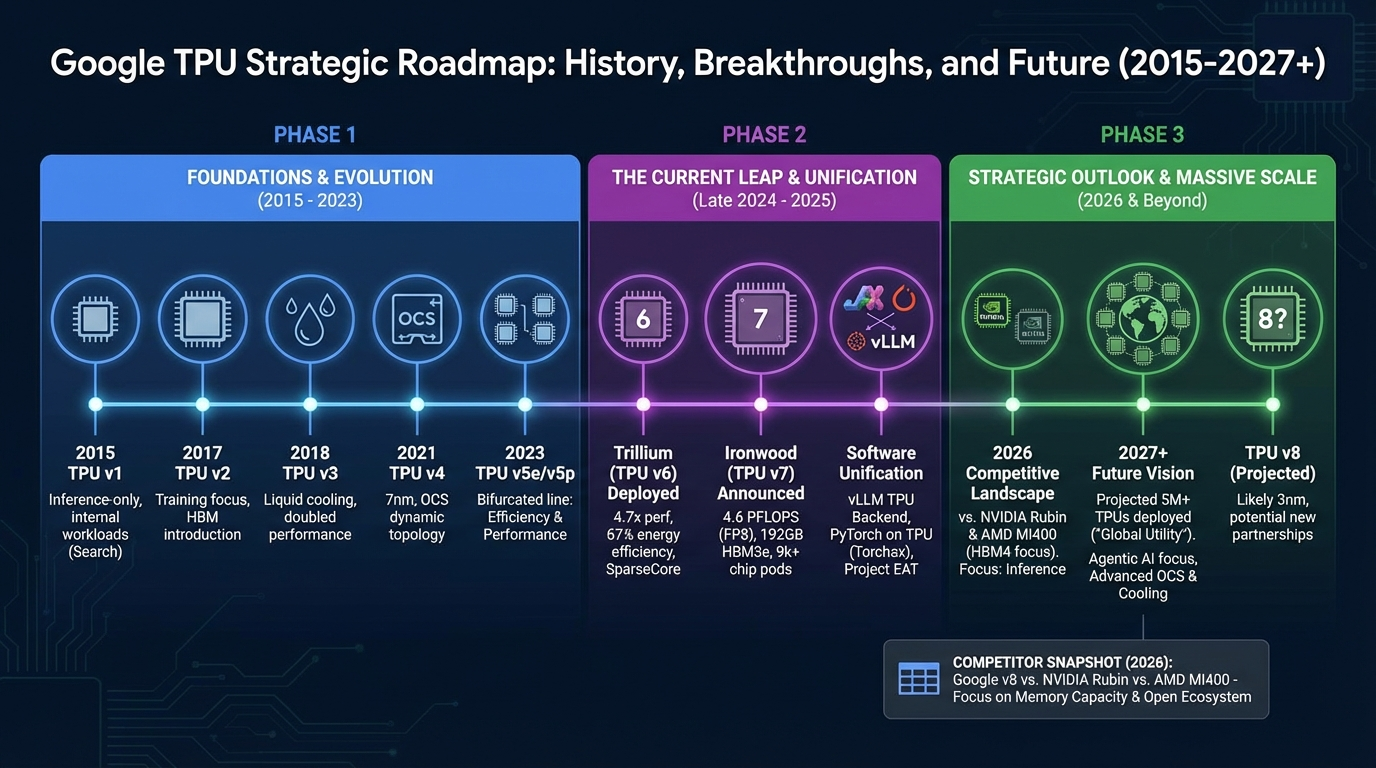

In [ ]:
import base64
from IPython.display import Image

print("Generating image...")
image_interaction = client.interactions.create(
    model="gemini-3-pro-image-preview",
    input="Visluaize the report ino a timeline slide",
    previous_interaction_id=interaction_id,
)

image_data = [data for data in image_interaction.outputs if data.type == "image"]

for output in image_data:
    image_data = base64.b64decode(output.data)
    display(Image(data=image_data))

In [17]:
print("Translating...")
translate_interaction = client.interactions.create(
    model="gemini-3-flash-preview",
    input="Translate the report into simple German.",
    previous_interaction_id=interaction_id,
)

display(Markdown(translate_interaction.outputs[-1].text))

Translating...


# Strategischer Bericht: Die Google TPU-Landschaft

**An:** Entwickler / KI-Infrastruktur-Architekten
**Thema:** Analyse der Google TPU-Entwicklung, Wettbewerb und Roadmap 2026+

## Zusammenfassung
Google beschleunigt die Entwicklung eigener KI-Chips (TPUs), um NVIDIA herauszufordern. Die letzten 12 Monate brachten mit **Trillium (v6)** und **Ironwood (v7)** große Fortschritte. Für Entwickler wird es einfacher: Dank neuer Software-Tools laufen PyTorch-Modelle jetzt fast ohne Änderungen auf TPUs. Bis 2027 will Google über 5 Millionen TPUs im Einsatz haben.

---

## 1. Kurze Geschichte der TPU
*   **Anfang (2015):** TPU v1 wurde nur für interne Aufgaben (wie Google Suche) genutzt.
*   **Training (2017–2018):** Mit v2 und v3 konnten erstmals große KI-Modelle trainiert werden.
*   **Skalierung (2021–2023):** TPU v4 und v5 wurden effizienter und für riesige Rechenzentren optimiert.

---

## 2. Technologische Durchbrüche (letzte 12 Monate)

### Hardware: Trillium und Ironwood
*   **Trillium (TPU v6):**
    *   Bietet **4,7-mal mehr Leistung** als der Vorgänger (v5e).
    *   Verbraucht **67 % weniger Energie**.
    *   Optimiert für Empfehlungs-Systeme und Ranking-Algorithmen.
*   **Ironwood (TPU v7):**
    *   Speziell für extrem schnelle Antworten der KI (Inferenz) entwickelt.
    *   Besitzt riesigen Speicher (**192 GB HBM3e**), um gigantische Modelle direkt im Chip zu halten.
    *   Konkurriert direkt mit NVIDIAs Blackwell-Chips.

### Software: Einfachere Nutzung
*   **vLLM & PyTorch:** Früher war der Wechsel von NVIDIA zu Google TPUs schwer. Jetzt gibt es Tools (wie `Torchax`), mit denen PyTorch-Code direkt auf TPUs läuft.
*   **Vereinheitlichung:** Google arbeitet daran, dass alle Entwickler-Tools (JAX, PyTorch, TensorFlow) die gleiche Leistung aus den Chips herausholen.

---

## 3. Wettbewerb: Google vs. NVIDIA vs. AMD

### Vergleich der Top 3 Unternehmen (Ausblick 2025–2026)

| Merkmal | Google (TPU) | NVIDIA (GPU) | AMD (Instinct) |
| :--- | :--- | :--- | :--- |
| **Top-Chip 2025** | **Ironwood (v7)** | **Blackwell Ultra** | **Instinct MI350** |
| **Top-Chip 2026** | **TPU v8 (Geplant)** | **Rubin (R100)** | **Instinct MI400** |
| **Hauptvorteil** | Preis-Leistungs-Sieger | Marktführer & Ökosystem | Riesiger Arbeitsspeicher |
| **Fokus** | Effizienz & Cloud-Skalierung | Maximale Rechenpower | Offene Software-Standards |

---

## 4. Zukunftspläne: 2026 und danach

*   **Massive Produktion:**
    *   Google plant bis 2027 eine Flotte von **5 Millionen TPUs**.
    *   Große Firmen wie Anthropic (Claude KI) nutzen bereits über 1 Million TPUs.
*   **TPU v8:**
    *   Soll mit modernster **3nm-Technik** von TSMC gefertigt werden.
    *   Wird wahrscheinlich noch kleiner, schneller und sparsamer.
*   **Agentic AI (KI-Agenten):**
    *   Chips ab 2026 werden darauf optimiert, dass die KI nicht nur Texte schreibt, sondern selbstständig komplexe Aufgaben ausführt (planen und handeln).
*   **Optische Vernetzung:**
    *   Google nutzt Lichtsignale statt Kupferkabel, um tausende Chips blitzschnell miteinander zu verbinden. Das spart Strom und senkt Verzögerungen.

---

## Fazit für Entwickler
Der "Zwang" zu NVIDIA-Hardware lässt nach. Google TPUs bieten mittlerweile eine echte Alternative für das Training und den Betrieb großer Modelle. Die Kostenersparnis liegt oft zwischen 20 % und 50 % im Vergleich zu herkömmlichen GPUs. JAX bleibt die schnellste Sprache für TPUs, aber PyTorch ist nun ebenfalls voll einsatzbereit.